#question(6) 
Propose methodology and data that needs to be pre-processed to gain insights from
“keywords” and “statement” from attached sheets

#Some import the Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Load the Data set

In [2]:
df = pd.read_csv("/content/drive/My Drive/categories.csv")

#Exploring the Data

In [3]:
df.shape

(702, 2)

In [4]:
df.head()

,Statement,Keywords
0,:dizzy::sunflower::herb: You might not see it ...,NaN
1,smiling_face_with_sunglasses: -...#founditonam...,NaN
2,#amazoninfluencer .Follow : @abdul_zubarti :ca...,NaN
3,to:.>Double tap if you like and .Comment your ...,NaN
4,Virgo:.>Follow me @abdul_zubarti :red_heart:.F...,amazondotin amazonfashion amazoninfluencer bek...


In [5]:
df.dtypes

Statement    object
Keywords     object
dtype: object

In [6]:
df.columns

Index(['Statement', 'Keywords'], dtype='object')

In [7]:
df.describe()

,Statement,Keywords
count,701,337
unique,646,322
top,.,awifesperspective
freq,16,3


In [8]:
df.isnull().sum()

Statement      1
Keywords     365
dtype: int64

#Cleaning the Nan Values

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Statement    0
Keywords     0
dtype: int64

In [11]:
df.head()

,Statement,Keywords
4,Virgo:.>Follow me @abdul_zubarti :red_heart:.F...,amazondotin amazonfashion amazoninfluencer bek...
5,rainbow:. .......#trendingfashion #fashionphot...,fashionmodelling fashionphotoshoot founditonam...
6,#fashionmodelling #bekindnessgod #iblradiance ...,lifehotoaisihi trendingfashion
8,foods though.You body digestion power is stron...,awifesperspective
10,fun.....#awifesperspective,awifesperspective


#Cleaning the Data set using nltk library

In [12]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


#Cleaning the "Statement" Column

In [13]:
#Cleaning the Statement Column
corpus = []
wnl = WordNetLemmatizer()

for Statement_string in list(df.Statement):
    #Cleaning special character from the Statement Column
    Statement = re.sub(pattern='[#,/,>,:,....,_,@,&]', repl=' ', string=Statement_string)
    #Converting the entire Statement into lower case
    Statement = Statement.lower()
    #Tokanizing the Statement by words
    words = Statement.split()
    #Removing the stopwards 
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    #Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]
    #Joining the lemmatized words
    Comment=' '.join(lemmatized_words)
    #Buliding the corpus of Statement column
    corpus.append(Statement)

In [14]:
corpus[:10]

['virgo   follow me  abdul zubarti  red heart  for more amazing post! white heavy check mark  ',
 'rainbow           trendingfashion  fashionphotoshoot  explorepageready  indianinfluencer',
 ' fashionmodelling  bekindnessgod  iblradiance  lifehotoaisihi',
 'foods though you body digestion power is strongest during this time    awifesperspective',
 'fun      awifesperspective',
 ' brokenheart  picoftheday  flower  pretty  black  handmade  hair  pink  funnytext  photography',
 'fibre helps in proper functioning of galt  some vitamin c enriched fruits are lemon  orange  pineapple ',
 'papaya  kiwi you can also squeeze lemon in their meal when they are having dal rice  high fibre food',
 'is lentil',
 'loop post to start gaining followers       mamasmegaloopteam0909 socialdistancing  momlife']

# convert words into TFIDF metrics

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(10, 0)

336 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
abdul,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amazing,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
heavy,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
virgo,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zubarti,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
follow,0.259405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mark,0.259405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
more,0.259405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
post,0.259405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
red,0.259405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# first 5 words with highest weight on Statement:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
abdul,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amazing,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
heavy,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
virgo,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zubarti,0.277788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Kmeans Clustering

In [17]:
from sklearn.cluster import KMeans

In [18]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(final_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [20]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(order_centroids, index):
    a = order_centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(order_centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(order_centroids)):
        centroid_dict = centroidsDict(order_centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

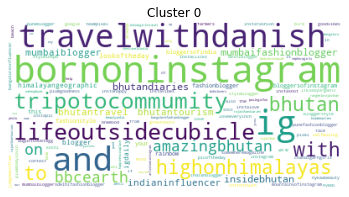

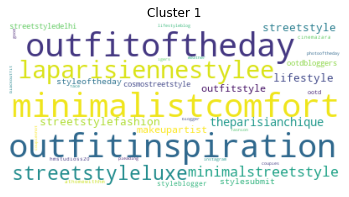

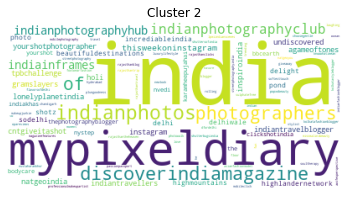

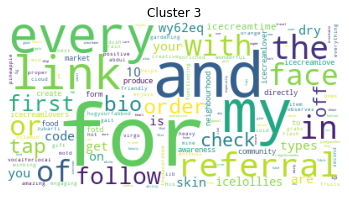

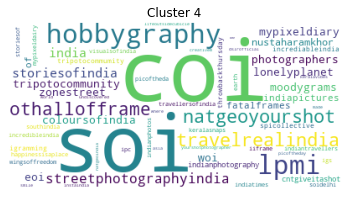

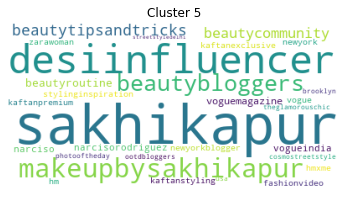

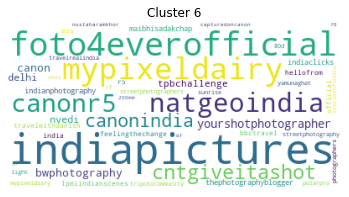

In [21]:
order_centroids = pd.DataFrame(model.cluster_centers_)
order_centroids.columns = final_df.columns
generateWordClouds(order_centroids)

In [22]:
model.labels_

array([3, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 5, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 3, 0, 0, 1, 5, 1, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0,
       1, 1, 1, 5, 5, 2, 0, 5, 5, 2, 5, 2, 0, 5, 5, 0, 1, 1, 1, 5, 0, 1,
       1, 1, 5, 0, 1, 1, 2, 5, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 3, 3, 0, 3, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 4, 2, 2, 0, 0, 4, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 4, 2, 4, 2, 4, 0, 2, 2, 2, 0, 0,
       4, 2, 2, 0, 0, 0, 3, 0, 0, 4, 3, 0, 2, 0, 0, 2, 4, 2, 2, 2, 2, 0,
       0, 4, 0, 2, 2, 2, 0, 0, 4, 2, 2, 0, 0, 0, 3, 4, 2, 4, 0, 0, 2, 2,
       6, 2, 6, 6, 6, 6, 2, 2, 0, 2, 2, 6, 0, 4, 4, 2, 2, 0, 2, 4, 4, 6,
       0, 2, 4, 4, 6, 0, 0, 2, 4, 4, 6, 2, 4, 4, 6,

In [23]:
print('\n')
print('Prediction')
X = vectorizer.transform(['#'])
predicted = model.predict(X)
print(predicted)



Prediction
[0]
